In [6]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
print("Loaded Libraries")


from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

import warnings
warnings.filterwarnings('ignore')


from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

Loaded Libraries


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#
plt.rcParams['figure.figsize'] = (3, 3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150      
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#

In [8]:
def points_plot(ax, Xtr, Xte, ytr, yte, 
                clf, 
                mesh = True, colorscale = cmap_light, cdiscrete = cmap_bold, 
                alpha = 0.1, psize = 10, 
                zfunc = False, predicted = False):
#
# note: this function only works for X.shape = (:, 2)
# it is intended to illustrate the classifier boundary
#
# get the column names if they exist to apply
# to the meshed data generated below
#
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#
    h = 0.02
#
# create a uniform grid spanning the range of the X values
# note that y here is NOT the target, it is the 2nd
# dimension of the desired plot
#
    X = np.concatenate((Xtrain, Xtest))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
#
# predict the target value at each point in the grid
#
# this method uses the probabilities from the classifier
# and applies a function to determine the class
#
    if zfunc:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                         columns = feature_names)
        p0 = clf.predict_proba(mesh_data)[:, 0]
        p1 = clf.predict_proba(mesh_data)[:, 1]
        Z = zfunc(p0, p1)
#
# this method uses the classifier to predict the classes directly
#
    else:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                                     columns = feature_names)
        Z = clf.predict(mesh_data)
    ZZ = Z.reshape(xx.shape)
#
# plt.pcolormesh() creates a shaded result over the grid
#
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, 
                       cmap = cmap_light, 
                       alpha = alpha, 
                       axes = ax, 
                       shading = 'auto')
#
# add the points to the plot
# these can be the original target values
# or the predicted values
#
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
#
# plot training points
#
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], 
               c = showtr - 1, 
               cmap = cmap_bold, 
               s = psize, 
               alpha = alpha, 
               edgecolor = "k")
#    
# plot testing points
#
    ax.scatter(Xtest[:, 0], Xtest[:, 1],
               c = showte - 1, 
               cmap = cmap_bold, 
               s = psize + 10,
               alpha = alpha, b
               marker = "s")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#
    return ax, xx, yy

SyntaxError: positional argument follows keyword argument (989260846.py, line 93)

In [9]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, 
                     clf, colorscale = cmap_light, cdiscrete = cmap_bold, 
                     ccolor = cm, 
                     alpha = 0.1, psize = 10):
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#    
    ax, xx, yy = points_plot(ax, Xtr, Xte, ytr, yte,
                         clf,
                         mesh = False, 
                         colorscale = colorscale, cdiscrete = cdiscrete, 
                         psize = psize, alpha = alpha,
                         predicted = True) 
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if feature_names is not None:
        mesh_data = pd.DataFrame(mesh_data, 
                     columns = feature_names)    
    Z = clf.predict_proba(mesh_data)[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = ccolor, alpha = 0.2)
    cs2 = plt.contour(xx, yy, Z, cmap = ccolor, alpha = 0.6)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 12)
#
    plt.show()

In [10]:
bank_cleaned2 = pd.read_csv('bank_cleaned2.csv', index_col=0)

In [11]:
bank_cleaned2.head()

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription,month_num,balance_group,campaign_contact_number,pdays_group,age_group,day_cat
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,NaN,0,2,0,10,no_balance,NaN,NaN,>60,1
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,NaN,0,2,1,4,high_balance,>6,NaN,>60,21
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,NaN,0,2,0,3,average_balance,NaN,NaN,>60,3
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13.0,9,1,1,8,average_balance,1,1-4months,>60,4
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177.0,7,1,1,7,average_balance,1,4-7months,>60,22


In [12]:
bank_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45210 non-null  int64  
 1   job                      45210 non-null  object 
 2   marital                  45210 non-null  object 
 3   education                45210 non-null  object 
 4   credits                  45210 non-null  object 
 5   balance                  45210 non-null  int64  
 6   housing                  45210 non-null  object 
 7   loan                     45210 non-null  object 
 8   contact_type             45210 non-null  object 
 9   day                      45210 non-null  int64  
 10  month                    45210 non-null  object 
 11  duration                 45210 non-null  int64  
 12  campaign                 45210 non-null  int64  
 13  pdays                    8256 non-null   float64
 14  previous              

In [13]:
bank_cleaned2['balance'].describe()

count     45210.000000
mean       1362.290179
std        3044.797065
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [14]:

bins = [-1000000000, 72, 448, 1428, 102127]
category = ['no_balance', 'low_balance', 'average_balance','high_balance']
bank_cleaned2['balance_group'] = pd.cut(bank_cleaned2['balance'], bins, labels = category)
bank_cleaned2['balance_group'].value_counts()


no_balance         11317
average_balance    11305
high_balance       11297
low_balance        11291
Name: balance_group, dtype: int64

In [15]:
#balance_counts = bank_cleaned2['balance_group'].value_counts().rename_axis('group').to_frame('counts')
#balance_counts

In [16]:
b_subscription_rate = pd.crosstab(bank_cleaned2.balance_group,bank_cleaned2.subscription).apply(lambda row: row/row.sum(), axis=1)

b_subscription_rate.columns = ['No', 'Yes']

b_subscription_rate


,No,Yes
balance_group,,
no_balance,0.927631,0.072369
low_balance,0.891064,0.108936
average_balance,0.874834,0.125166
high_balance,0.838453,0.161547


<AxesSubplot:xlabel='Yes', ylabel='Density'>

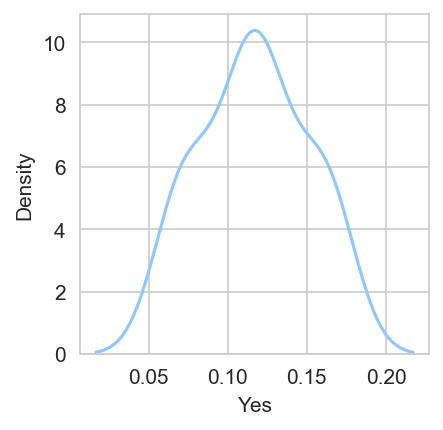

In [17]:
sns.set_style('whitegrid')
sns.kdeplot(b_subscription_rate['Yes'], bw=0.5)

In [18]:
def make_log_balance(num):
    if num == 0:
        return 0
    elif num < 0:
        return -np.log(abs(num))
    else:
        return np.log(num)

In [19]:
bank_cleaned2['natural_log'] = bank_cleaned2['balance'].apply(make_log_balance)
bank_natural_log= bank_cleaned2[['natural_log','balance']]
bank_natural_log
#bank_cleaned2['natural_log'].value_counts()

,natural_log,balance
0,0.000000,0
1,7.732808,2282
2,7.118016,1234
3,6.652863,775
4,6.652863,775
...,...,...
45206,1.609438,5
45207,5.049856,156
45208,6.410175,608
45209,6.410175,608


In [20]:
bank_cleaned2['natural_log'].describe()

count    45210.000000
mean         4.877992
std          3.812037
min         -8.989569
25%          4.276666
50%          6.104793
75%          7.264030
max         11.533972
Name: natural_log, dtype: float64

In [21]:
bins_log = [-100000000, 4.3, 6.1, 7.2, 12]
category_log = ['no_balance', 'low_balance', 'average_balance','high_balance']
bank_cleaned2['balance_group_log'] = pd.cut(bank_cleaned2['natural_log'], bins_log, labels = category_log)


In [22]:
bank_cleaned2['balance_group_log'].value_counts()

high_balance       11919
no_balance         11347
low_balance        11207
average_balance    10737
Name: balance_group_log, dtype: int64

In [23]:
log_subscription_rate = pd.crosstab(bank_cleaned2.balance_group_log,bank_cleaned2.subscription).apply(lambda row: row/row.sum(), axis=1)

log_subscription_rate.columns = ['No', 'Yes']

log_subscription_rate

,No,Yes
balance_group_log,,
no_balance,0.927382,0.072618
low_balance,0.891407,0.108593
average_balance,0.873987,0.126013
high_balance,0.841010,0.158990


<AxesSubplot:xlabel='Yes', ylabel='Density'>

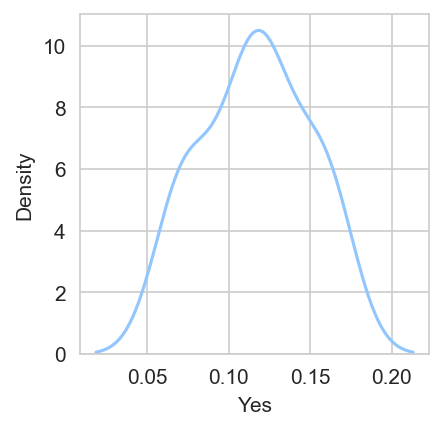

In [24]:
sns.set_style('whitegrid')
sns.kdeplot(log_subscription_rate['Yes'], bw=0.5)

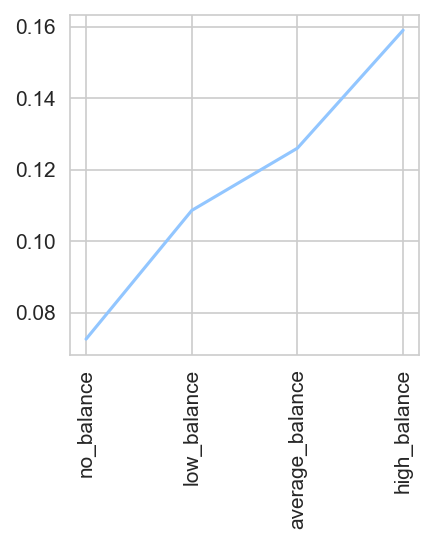

In [25]:
plt.plot(log_subscription_rate['Yes'])
plt.xticks(rotation='vertical')

plt.show()

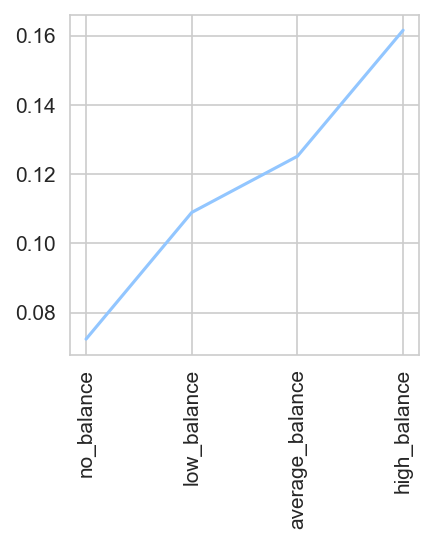

In [26]:
plt.plot(b_subscription_rate['Yes'])
plt.xticks(rotation='vertical')

plt.show()

## Random Oversampling

In [27]:
class_counts = bank_cleaned2['subscription'].value_counts()
class_percentages = pd.Series([(x / bank_cleaned2.shape[0]) * 100.00 for x in class_counts])



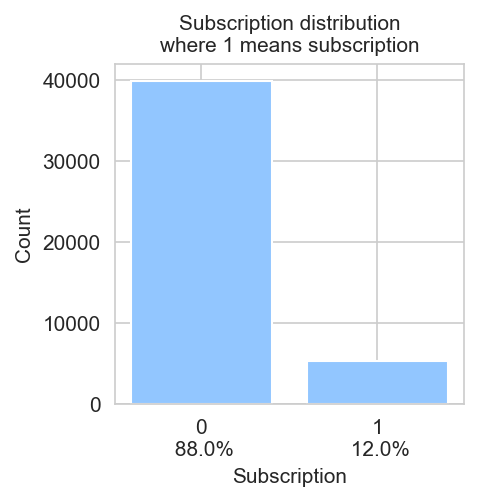

In [28]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Subscription')
ax.set_title('Subscription distribution\nwhere 1 means subscription',
              fontsize = 10)
plt.show()

In [29]:
# class count
subscription_count_0, subscription_count_1 = bank_cleaned2['subscription'].value_counts()

# Separate class
subscription_0 = bank_cleaned2[bank_cleaned2['subscription'] == 0]
subscription_1 = bank_cleaned2[bank_cleaned2['subscription'] == 1]

      

total subscription of 1 and 0: 1    39921
0    39921
Name: subscription, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

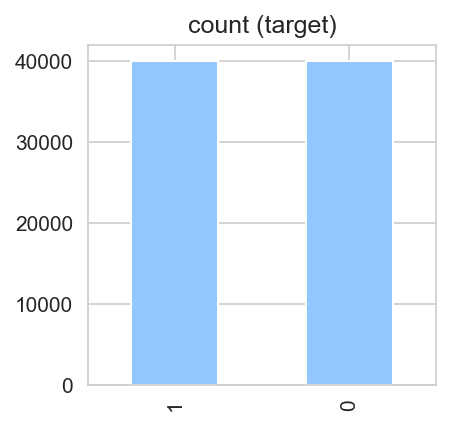

In [30]:
subscription_1_over = subscription_1.sample(subscription_count_0, replace=True)

test_over = pd.concat([subscription_1_over, subscription_0], axis=0)

print("total subscription of 1 and 0:",test_over['subscription'].value_counts())
test_over['subscription'].value_counts().plot(kind='bar', title='count (target)')



In [31]:
test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79842 entries, 9790 to 45210
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      79842 non-null  int64   
 1   job                      79842 non-null  object  
 2   marital                  79842 non-null  object  
 3   education                79842 non-null  object  
 4   credits                  79842 non-null  object  
 5   balance                  79842 non-null  int64   
 6   housing                  79842 non-null  object  
 7   loan                     79842 non-null  object  
 8   contact_type             79842 non-null  object  
 9   day                      79842 non-null  int64   
 10  month                    79842 non-null  object  
 11  duration                 79842 non-null  int64   
 12  campaign                 79842 non-null  int64   
 13  pdays                    20718 non-null  float64 
 14  pre

# Modeling 

In [32]:
test_over = test_over.drop(columns =['duration','month', 'age_group', 'pdays_group', 'campaign_contact_number', 'balance_group_log', 'natural_log','balance_group'])
categorical_features = ['contact_type', 'loan', 'housing', 'credits', 'education', 'marital', 'job']

bank_dummies = pd.get_dummies(test_over, columns = categorical_features)
print('The data have ', test_over.shape[0], ' rows and ', test_over.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(bank_dummies.columns)))



The data have  79842  rows and  17  columns

column names: 

age
balance
day
campaign
pdays
previous
poutcome
subscription
month_num
day_cat
contact_type_cellular
contact_type_telephone
contact_type_unknown
loan_no
loan_yes
housing_no
housing_yes
credits_no
credits_yes
education_primary
education_secondary
education_tertiary
education_unknown
marital_divorced
marital_married
marital_single
job_admin.
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown


In [33]:
bank_dummies.head()

,age,balance,day,campaign,pdays,previous,poutcome,subscription,month_num,day_cat,contact_type_cellular,contact_type_telephone,contact_type_unknown,loan_no,loan_yes,housing_no,housing_yes,credits_no,credits_yes,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
9790,50,388,11,2,NaN,0,2,1,3,11,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
35156,32,0,5,4,NaN,0,2,1,2,5,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
17925,43,132,19,1,84.0,3,1,1,8,19,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
568,69,3588,10,1,NaN,0,2,1,12,10,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
41823,28,1348,6,2,NaN,0,2,1,8,6,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [34]:
bank_dummies.fillna(99999, inplace=True)
bank_dummies.head()

,age,balance,day,campaign,pdays,previous,poutcome,subscription,month_num,day_cat,contact_type_cellular,contact_type_telephone,contact_type_unknown,loan_no,loan_yes,housing_no,housing_yes,credits_no,credits_yes,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
9790,50,388,11,2,99999.0,0,2,1,3,11,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
35156,32,0,5,4,99999.0,0,2,1,2,5,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
17925,43,132,19,1,84.0,3,1,1,8,19,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
568,69,3588,10,1,99999.0,0,2,1,12,10,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
41823,28,1348,6,2,99999.0,0,2,1,8,6,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [35]:
X = bank_dummies.drop(columns = ['subscription'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (79842, 37)


In [36]:
y = bank_dummies['subscription']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (79842,)


In [37]:
list(X.columns)

['age',
 'balance',
 'day',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'month_num',
 'day_cat',
 'contact_type_cellular',
 'contact_type_telephone',
 'contact_type_unknown',
 'loan_no',
 'loan_yes',
 'housing_no',
 'housing_yes',
 'credits_no',
 'credits_yes',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown']

### Building a Logistic Regression Model with all Features

In [102]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size = 0.25, random_state = 2, stratify = y)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  59881  rows
 and the corresponding labels have an equal number of values. (59881)
Test split has  19961  rows
 and the corresponding labels have an equal number of values. (19961)


In [103]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [104]:
clf.fit(Xlr, ylr) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [105]:
y_predict_test = clf.predict(Xtestlr)
y_predict_training = clf.predict(Xlr)

In [106]:
print("[Test] Accuracy score (y_predict_test, ytestlr):",
      f'{accuracy_score(ytestlr, y_predict_test):.2f}')

[Test] Accuracy score (y_predict_test, ytestlr): 0.68


In [107]:
print("[Training] Accuracy score: (ylr, y_predict_training)", 
      f'{accuracy_score(ylr, y_predict_training):.2f}')


[Training] Accuracy score: (ylr, y_predict_training) 0.67


### Building a Logistic Regression Model with Five and Ten Features

<AxesSubplot:title={'center':'Feature Importance'}>

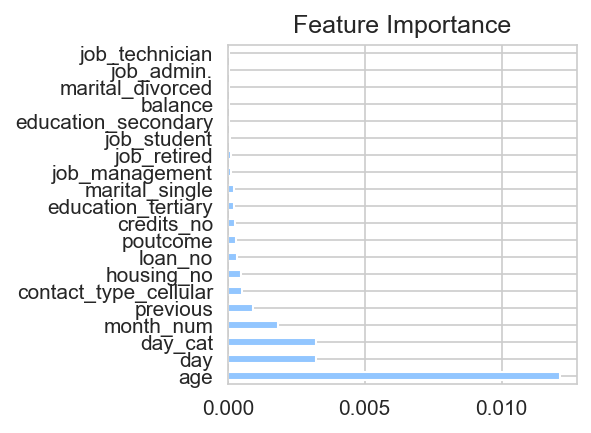

In [108]:
log_reg = LogisticRegression()
model = log_reg.fit(X, y)
importance = log_reg.coef_[0]

feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')




In [109]:
log_feature_5 = ['age', 'day', 'month_num','previous', 'contact_type_cellular']
log_feature_10 =  ['age', 'day', 'month_num','previous', 'contact_type_cellular', 'housing_no', 'loan_no','poutcome', 'credits_no', 'marital_single']


In [110]:
X_log_5 = X[log_feature_5]
y = bank_dummies['subscription']


In [111]:
Xlog5, Xtest_log5, ylog5, ytest_log5 = train_test_split(X_log_5, y, test_size = 0.25, random_state = 2, stratify = y)

clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)
clf.fit(Xlog5, ylog5) 
y_predict_test_log5 = clf.predict(Xtest_log5)
y_predict_training_log5 = clf.predict(Xlog5)
print("[Test] Accuracy score (y_predict_test_log5, ytest_log5):",
      f'{accuracy_score(ytest_log5, y_predict_test_log5):.2f}')
print("[Training] Accuracy score: (ylog5, y_predict_training_log5):", 
      f'{accuracy_score(ylog5, y_predict_training_log5):.2f}')


[Test] Accuracy score (y_predict_test_log5, ytest_log5): 0.60
[Training] Accuracy score: (ylog5, y_predict_training_log5): 0.59


In [112]:
X_log_10 = X[log_feature_10]

In [113]:
Xlog10, Xtest_log10, ylog10, ytest_log10 = train_test_split(X_log_10, y, test_size = 0.25, random_state = 2, stratify = y)

clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)
clf.fit(Xlog10, ylog10) 
y_predict_test_log10 = clf.predict(Xtest_log10)
y_predict_training_log10 = clf.predict(Xlog10)
print("[Test] Accuracy score (y_predict_test_log10, ytest_log10):",
      f'{accuracy_score(ytest_log10, y_predict_test_log10):.2f}')
print("[Training] Accuracy score: (ylog10, y_predict_training_log10):", 
      f'{accuracy_score(ylog10, y_predict_training_log10):.2f}')


[Test] Accuracy score (y_predict_test_log10, ytest_log10): 0.65
[Training] Accuracy score: (ylog10, y_predict_training_log10): 0.65


In [114]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print(roc_auc_score(ytestlr, y_predict_test))

0.6753686162024479


It looks like the model has the best accuracy score when it includes all the features.

### Improve the model

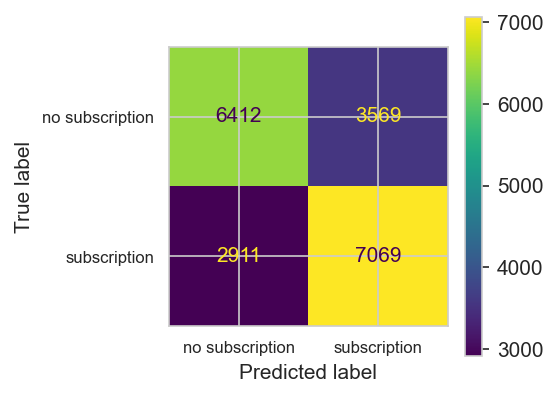

In [115]:
cm = confusion_matrix(ytestlr, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no subscription', 'subscription'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no subscription', 'subscription'], fontsize = 8)
ax.set_yticklabels(labels = ['no subscription', 'subscription'], fontsize = 8)
display_cm.plot(ax = ax)

In [116]:
print(classification_report(ylr, y_predict_training))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66     29940
           1       0.66      0.70      0.68     29941

    accuracy                           0.67     59881
   macro avg       0.67      0.67      0.67     59881
weighted avg       0.67      0.67      0.67     59881



In [117]:
print(classification_report(ytestlr, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      9981
           1       0.66      0.71      0.69      9980

    accuracy                           0.68     19961
   macro avg       0.68      0.68      0.68     19961
weighted avg       0.68      0.68      0.68     19961



In [118]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
#space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [0.0001, 0.001, .01, .1, .5, 1, 10]

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, space, cv=5, scoring='roc_auc')
logreg_cv.fit(Xlr,ylr)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc')

In [119]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Best AUC-ROC score is 0.7315814308814483


In [120]:
lr_fpr, lr_tpr, _ = roc_curve(ytestlr, logreg_cv.predict_proba(Xtestlr)[:, 1])


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import itertools

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

In [40]:

RFModel = RandomForestClassifier(max_depth=3, random_state= 1234)

RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)
RFModel


RandomForestClassifier(max_depth=3, random_state=1234)

In [41]:
print("RFModel")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

RFModel
Accuracy: 0.6693552427233105
Balanced accuracy: 0.6691903460232771
Precision score 0.6641897685052872
Recall score 0.6444422029453298


30


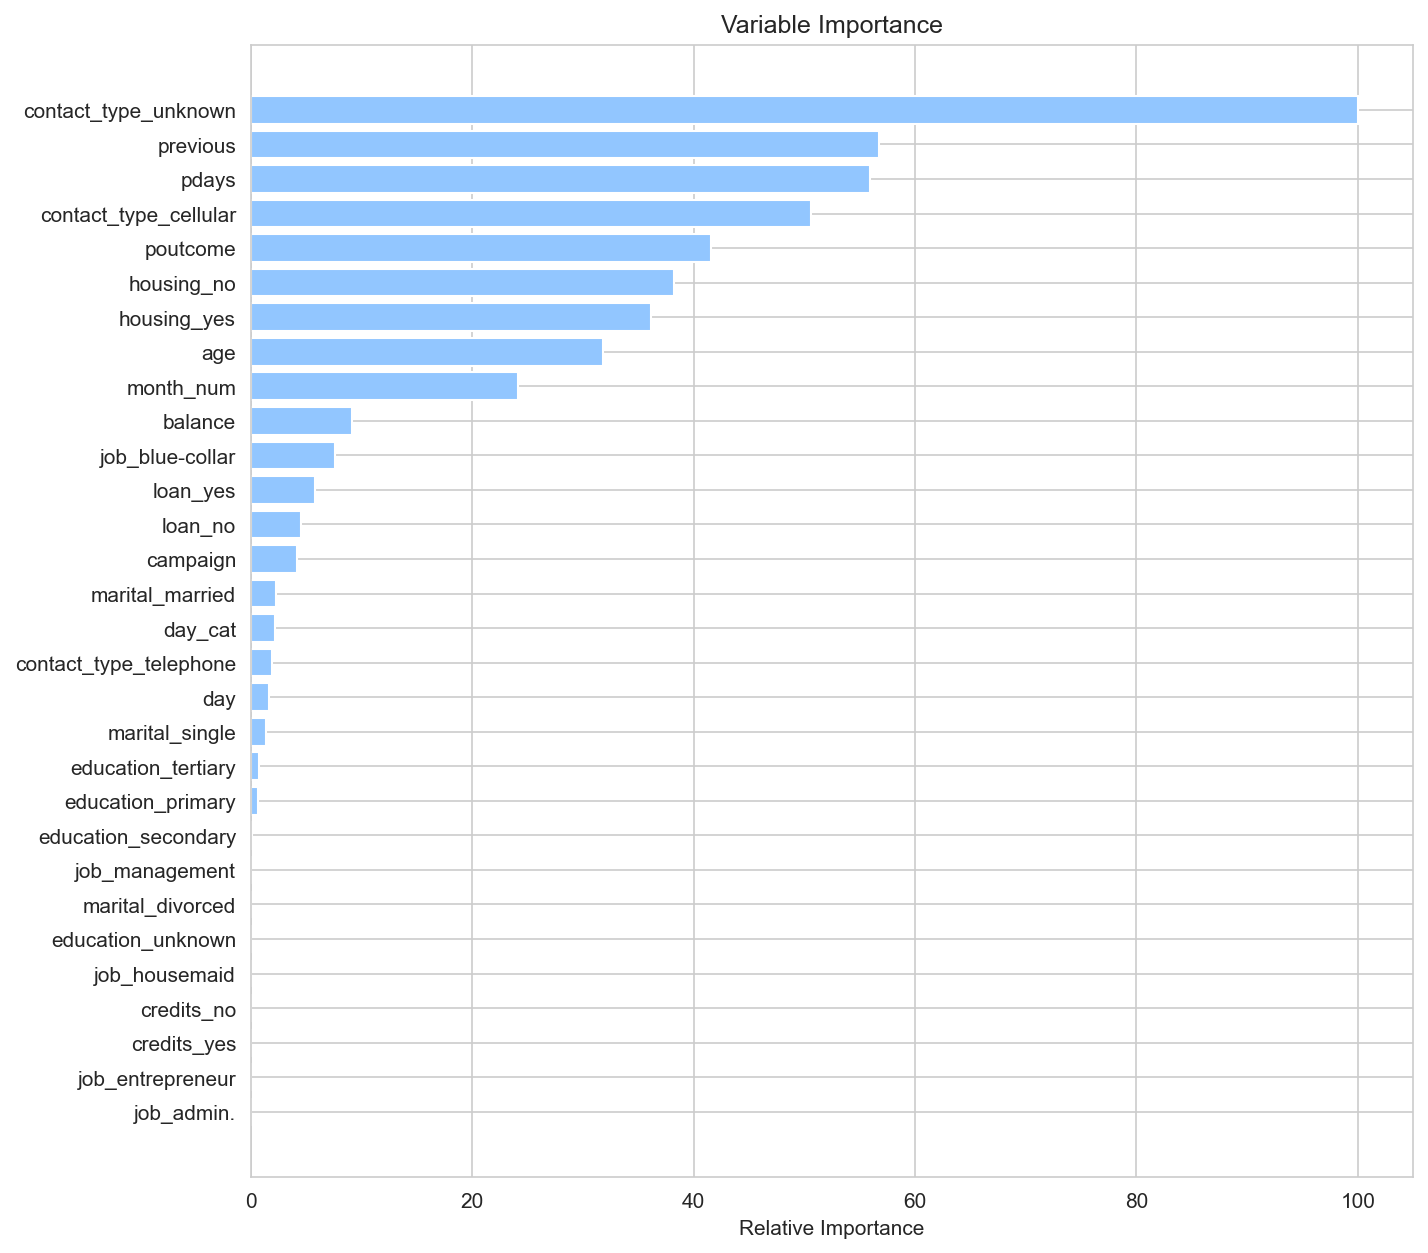

In [42]:
#clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)

feature_importance = RFModel.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [43]:
forest_feature_5 = ['contact_type_unknown', 'previous', 'pdays','poutcome', 'contact_type_cellular']
forest_feature_10 =  ['contact_type_unknown', 'previous', 'pdays','poutcome', 'contact_type_cellular', 'housing_yes', 'housing_no', 'age', 'month_num', 'balance']


In [44]:
X_forest_5 = X[forest_feature_5]
y = bank_dummies['subscription']

In [46]:
X_train_5, X_test_5, y_train_5, y_test_5= train_test_split(X_forest_5, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

RFModel = RandomForestClassifier(max_depth=3, random_state= 1234)

RFModel.fit(X_train_5, y_train_5)
y_pred_5 = RFModel.predict(X_test_5)
y_pred_5 = pd.Series(y_pred_5)
RFModel

print("Accuracy:", metrics.accuracy_score(y_test_5,y_pred_5))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test_5,y_pred_5))
print('Precision score' , metrics.precision_score(y_test_5,y_pred_5, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test_5,y_pred_5, pos_label = 0))

Accuracy: 0.614297880867692
Balanced accuracy: 0.6126480656910102
Precision score 0.5785915115812023
Recall score 0.3650393383094614


In [47]:
X_forest_10 = X[forest_feature_10]
y = bank_dummies['subscription']

In [48]:
X_train_10, X_test_10, y_train_10, y_test_10= train_test_split(X_forest_10, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

In [49]:
RFModel.fit(X_train_10, y_train_10)
y_pred_10 = RFModel.predict(X_test_10)
y_pred_10 = pd.Series(y_pred_10)
RFModel

print("Accuracy:", metrics.accuracy_score(y_test_10,y_pred_10))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test_10,y_pred_10))
print('Precision score' , metrics.precision_score(y_test_10,y_pred_10, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test_10,y_pred_10, pos_label = 0))

Accuracy: 0.6647963528881319
Balanced accuracy: 0.664672980706636
Precision score 0.6617817200154261
Recall score 0.6461569497680049


### It looks like 'all features' renders the best result. 

### Improve the model

Confusion matrix, without normalization
[[6389 3525]
 [3075 6972]]
Normalized confusion matrix
[[0.64 0.36]
 [0.31 0.69]]


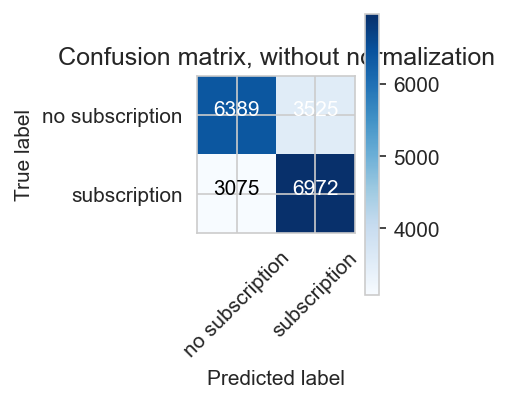

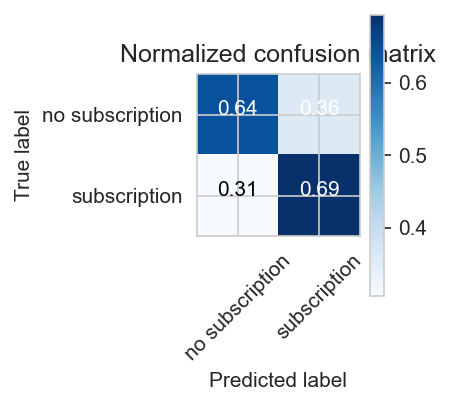

In [52]:
cm = confusion_matrix(y_test, y_pred)
class_names=['no subscription', 'subscription']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      9914
           1       0.66      0.69      0.68     10047

    accuracy                           0.67     19961
   macro avg       0.67      0.67      0.67     19961
weighted avg       0.67      0.67      0.67     19961



### Grid search


In [54]:

rfc=RandomForestClassifier(random_state=1234)

param_grid = { 
    'n_estimators': [200, 500],
    
    'max_depth' : [3,4,5,6],
   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [3, 4, 5, 6], 'n_estimators': [200, 500]})

In [55]:
print("Tuned Random Forest Parameters: {}".format(CV_rfc.best_params_)) 


Tuned Random Forest Parameters: {'max_depth': 6, 'n_estimators': 500}


In [56]:
rfc_best=RandomForestClassifier(random_state=1234, n_estimators= 500, max_depth=6)



In [58]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500, random_state=1234)

In [59]:
rfc_best_pred=rfc_best.predict(X_test)

In [60]:
print(roc_auc_score(y_test, rfc_best_pred))

0.7143190219605137


In [61]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rfc_best.predict_proba(X_test)[:, 1])


## Gradient Boosting

In [82]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb= train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gradboost_model = gradboost_clf.fit(X_train_gb, y_train_gb)
gradboost_model_fit = gradboost_model.predict(X_test_gb)
print(accuracy_score(y_test_gb, gradboost_model_fit).round(3))



0.686


In [81]:
features=[]
for columns in X.columns:
    features.append(columns)
gb_imp_features = gradboost_model.feature_importances_
for i in gb_imp_features:
    i.round(3)
gb_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":gb_imp_features}))
gb_imp_features.sort_values(by=['weights'], ascending=False)



,features,weights
11,contact_type_unknown,0.209374
7,month_num,0.168208
4,pdays,0.133115
6,poutcome,0.128468
0,age,0.072531
1,balance,0.050418
14,housing_no,0.048760
8,day_cat,0.030286
2,day,0.029543
3,campaign,0.029066


In [86]:
gb_feature_5 = ['contact_type_unknown', 'month_num', 'pdays','poutcome', 'age']
gb_feature_10 =  ['contact_type_unknown', 'month_num', 'pdays','poutcome', 'age','balance','housing_no', 'age', 'day', 'campaign']


In [87]:
X_gb_5 = X[gb_feature_5]
y = bank_dummies['subscription']

In [88]:
X_train_gb_5, X_test_gb_5, y_train_gb_5, y_test_gb_5= train_test_split(X_gb_5, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

gradboost_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gradboost_model_5 = gradboost_clf.fit(X_train_gb_5, y_train_gb_5)
y_gb_predict_5 = gradboost_model_5.predict(X_test_gb_5)
print(accuracy_score(y_test_gb_5, y_gb_predict_5).round(3))




0.704


In [89]:
X_gb_10 = X[gb_feature_10]
X_train_gb_10, X_test_gb_10, y_train_gb_10, y_test_gb_10= train_test_split(X_gb_10, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

gradboost_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gradboost_model_10 = gradboost_clf.fit(X_train_gb_10, y_train_gb_10)
y_gb_predict_10 = gradboost_model_10.predict(X_test_gb_10)
print(accuracy_score(y_test_gb_10, y_gb_predict_10).round(3))

0.699


### it looks like feature 5 has the best accuracy result

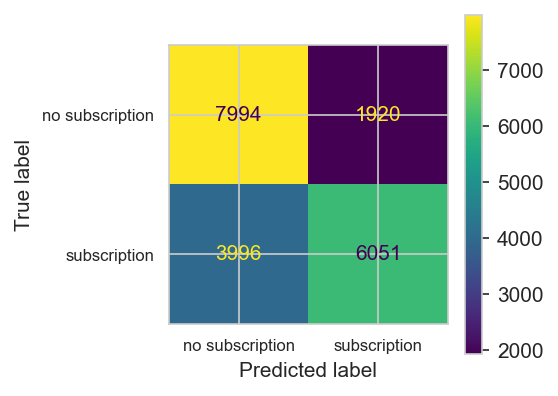

In [121]:
cm_gb = confusion_matrix(y_test_gb_5, y_gb_predict_5, labels = gradboost_clf.classes_)
_, ax = plt.subplots()
display_cm_gb = ConfusionMatrixDisplay(confusion_matrix = cm_gb, 
                                    display_labels = ['no subscription', 'subscription'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no subscription', 'subscription'], fontsize = 8)
ax.set_yticklabels(labels = ['no subscription', 'subscription'], fontsize = 8)
display_cm_gb.plot(ax = ax)

In [122]:
print(classification_report(y_test_gb_5, y_gb_predict_5))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      9914
           1       0.76      0.60      0.67     10047

    accuracy                           0.70     19961
   macro avg       0.71      0.70      0.70     19961
weighted avg       0.71      0.70      0.70     19961



In [98]:
gradboost_model=GradientBoostingClassifier(random_state=0)
parameters = {
    "n_estimators":[10,20],
    "learning_rate": [0.05, 0.1, 0.25, 0.5,0.75,1],
    "max_depth":[2,5,8],
    "max_features":["log2","sqrt"]   
    }

CV_gb = GridSearchCV(gradboost_model, parameters, cv= 5, scoring='roc_auc')
CV_gb.fit(X_train_gb_5, y_train_gb_5)

print("Tuned Random Forest Parameters: {}".format(CV_gb.best_params_)) 



Tuned Random Forest Parameters: {'learning_rate': 1, 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 20}


In [124]:
gb_best=GradientBoostingClassifier(random_state=0, n_estimators= 20, learning_rate =1, max_depth=8, max_features = 'log2')
gb_best.fit(X_train_gb_5, y_train_gb_5)
gb_best_pred=gb_best.predict(X_test_gb_5)
print(roc_auc_score(y_test_gb_5, gb_best_pred))



0.7489703878958727


In [125]:
gb_fpr, gb_tpr, _ = roc_curve(y_test_gb_5, gb_best.predict_proba(X_test_gb_5)[:, 1])



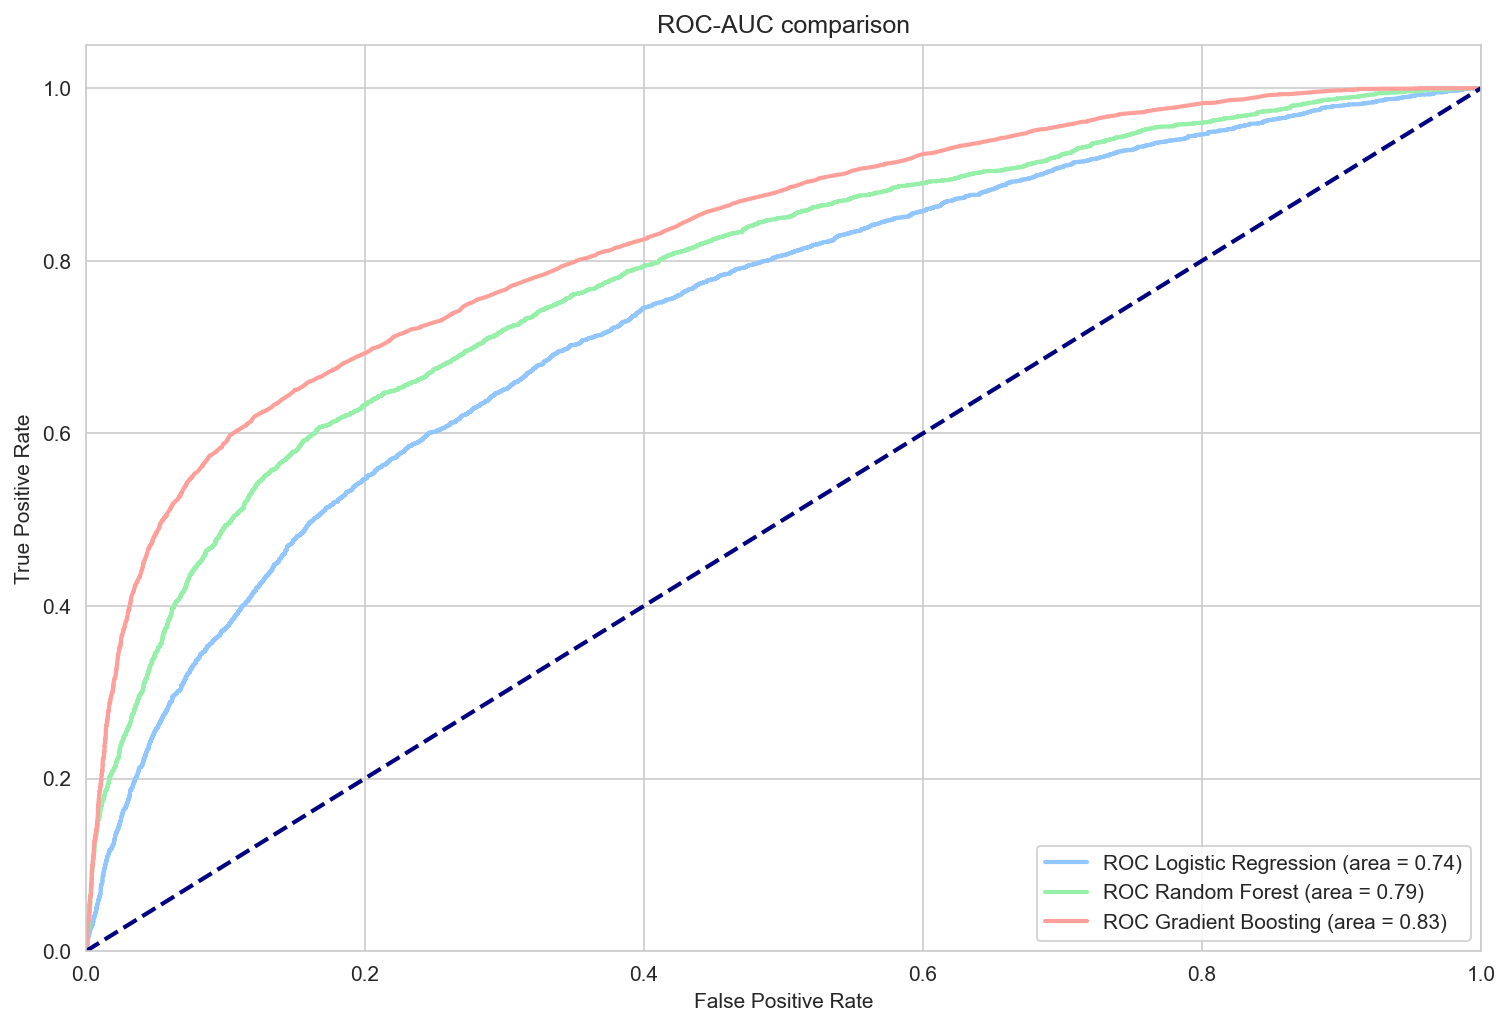

In [127]:
plt.figure(figsize=(12,8))

for fpr, tpr, model in [(lr_fpr,lr_tpr,'Logistic Regression'),(rf_fpr,rf_tpr,'Random Forest'),(gb_fpr,gb_tpr,'Gradient Boosting')]:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             lw=2, label='ROC '+ model + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC comparison')
plt.legend(loc="lower right")
plt.show()

In [51]:
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled=scaler.transform(X_train)
#X_test_scaled=scaler.transform(X_test)

#from sklearn.ensemble import RandomForestClassifier
#model_res = clf.fit(X_train_scaled, ylr)
#y_pred = model_res.predict(X_test_scaled)
#y_pred_prob = model_res.predict_proba(X_test_scaled)
#lr_probs = y_pred_prob[:,1]
#ac = accuracy_score(ytestlr, y_pred)

#f1 = f1_score(ytestlr, y_pred, average='weighted')
#cm = confusion_matrix(ytestlr, y_pred)

#print('Random Forest: Accuracy=%.3f' % (ac))

#print('Random Forest: f1-score=%.3f' % (f1))